In [1]:
import mph
import matplotlib.pyplot as plt

In [17]:
client = mph.start()
model = client.load("data/bend/beam.mph")

In [21]:
model.parameters()
def updateParam(model, young=10e10, rho=8.34e3, eta=0.01):
    model.parameter('Youngs', str(young)+' [Pa]')
    model.parameter('density', str(rho)+' [kg/m^3]')
    model.parameter('damping', str(eta)+' [Pa]')

updateParam(model, young=10e10, rho=8.34e3, eta=0.01)
model.parameters()

{'Youngs': '100000000000.0 [Pa]',
 'density': '8340.0 [kg/m^3]',
 'F0': '1 [N]',
 'damping': '0.01 [Pa]'}

In [11]:
model.solve("Study 3")

In [35]:
a = model.evaluate('comp1.point1')


In [38]:
a

# range of values used for the comsol studio
# range(10, 10, 470) range(470, 1, 520) range(520, 5, 600) range(600, 1,700) range(700, 10,1350) range(1350,1, 1390) range(1390,20,1570) range(1570,1,1630) range(1630,100,2650) range(2650,1,2750) range(2750, 20 ,2950) range(2950, 1, 3050)

array([8.03718742e-02+9.16109606e-07j, 7.28901931e-02+1.01064358e-06j,
       6.66396336e-02+1.10602167e-06j, 6.13359525e-02+1.20233990e-06j,
       5.67761103e-02+1.29967595e-06j, 5.28111964e-02+1.39812274e-06j,
       4.93295154e-02+1.49777546e-06j, 4.62456450e-02+1.59872844e-06j,
       4.34931320e-02+1.70107516e-06j, 4.10195078e-02+1.80491995e-06j,
       3.87827816e-02+1.91036678e-06j, 3.67489541e-02+2.01752444e-06j,
       3.48901965e-02+2.12650610e-06j, 3.31835097e-02+2.23742760e-06j,
       3.16097182e-02+2.35041192e-06j, 3.01527045e-02+2.46558600e-06j,
       2.87988206e-02+2.58308327e-06j, 2.75364309e-02+2.70304239e-06j,
       2.63555512e-02+2.82560802e-06j, 2.52475641e-02+2.95093414e-06j,
       2.42049917e-02+3.07917966e-06j, 2.32213092e-02+3.21051306e-06j,
       2.22907974e-02+3.34511137e-06j, 2.14084196e-02+3.48316050e-06j,
       2.05697193e-02+3.62485706e-06j, 1.97707387e-02+3.77040825e-06j,
       1.90079476e-02+3.92003305e-06j, 1.82781853e-02+4.07396279e-06j,
      

Text(0, 0.5, 'mobility / dB')

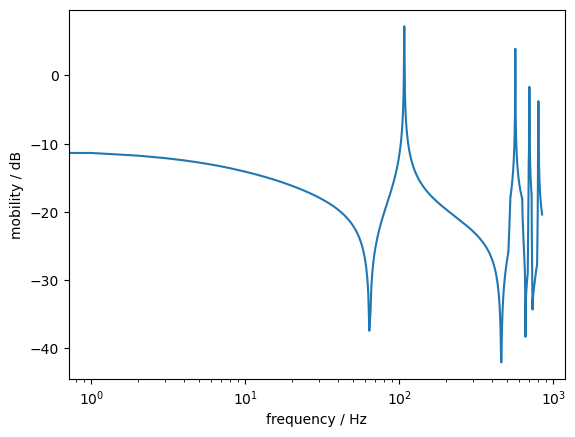

In [37]:
import numpy as np
plt.semilogx(10*np.log10(abs(a)))
plt.xlabel("frequency / Hz")
plt.ylabel("mobility / dB")

In [14]:
root = folder/'multiphysics'
architectures = {                      # valid system architecture names
    'Windows': ['win64'],
    'Linux':   ['glnxa64'],
    'Darwin':  ['maci64'],
}

In [17]:
for arch in architectures['Darwin']:
            comsol = root/'bin'/arch/'comsol'
            if comsol.is_file():
                print("here")
                break

In [18]:
comsol

PosixPath('/Applications/COMSOL61/multiphysics/bin/maci64/comsol')

In [25]:
import numpy as np
import pandas as pd
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO, MCMC, NUTS

import torch
from torch.distributions import constraints

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
def updateParam(model, young=10e10, rho=8.34e3, eta=0.01):
    model.parameter('Youngs', str(young)+' [Pa]')
    model.parameter('density', str(rho)+' [kg/m^3]')
    model.parameter('damping', str(eta)+' [Pa]')

def modelTest():
    E_mean = pyro.param("E_mean", dist.Normal(1, 3.))
    E_var = pyro.param("E_var", dist.Cauchy(1., 0.))
    E = pyro.sample("E", dist.Normal(E_mean, E_var))
    print("running iterations")
    with pyro.plate("data", y_obs.shape[1]):
        updateParam(model, young=E)
        model.solve("Study 3")
        y_values = model.evaluate('comp1.point1')
        y = pyro.sample("y", dist.Normal(y_values, 1.))
    return y

pyro.clear_param_store()
pyro.render_model(modelTest, render_distributions=True)

freq = pd.read_csv(".Data/bend/pointTableComsol.csv")

nuts_kernel = NUTS(modelTest)
mcmc = MCMC(nuts_kernel, warmup_steps=2, num_chains=1)        
mcmc.run()

# Show summary of inference results
mcmc.summary()
posterior_samples = mcmc.get_samples()

sns.displot(posterior_samples["E"]*10e10)
plt.xlabel("Young's modulus values")
plt.show()
        
sns.displot(posterior_samples["rho"]*10e10)
plt.xlabel("density values")
plt.show()
return

running iterations


NameError: name 'y_obs' is not defined

In [27]:
freq = pd.read_csv("./Data/bend/pointTableComsol.csv")


In [34]:
freq['% Model'][4:].values

array(['10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110',
       '120', '130', '140', '150', '160', '170', '180', '190', '200',
       '210', '220', '230', '240', '250', '260', '270', '280', '290',
       '300', '310', '320', '330'], dtype=object)